<a href="https://colab.research.google.com/github/wesmith4/mat210/blob/main/hw1/h1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 1 
Name: h1.ipynb

Author: Tim Chartier for Math 210, Davidson College

Comments:
1. To familiarize yourself with the code, you may wish to view the code 
   below the marked lines.  However, for your homework for Math 210, you 
   need only to edit above the dotted lines.  
2. For the interested programmer, try using the cla command and updating
   the histogram in the main loop of experiments.  This will enable you
   to view the updates.  You will need to use the pause command to enable
   the screen to be updated. 
***   

Initialize variables

In [ ]:
number_of_experiments = 300
number_of_rolls = 100

# number_of_rolls = 3 # for part c
# number_of_rolls = 10 # for part c
# number_of_rolls = 100 # for part c

Array of probabilities.  

In [ ]:
prob = (1/6, 1/6, 1/6, 1/6, 1/6, 1/6)
# prob = (4/24, 1/12, 1/24, 1/24, 1/24, 15/24) # probabilities for part c

***
### You do __not__ need to edit below this line

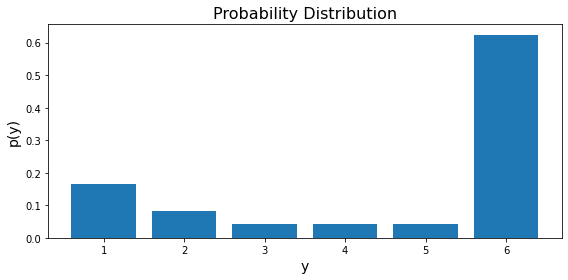

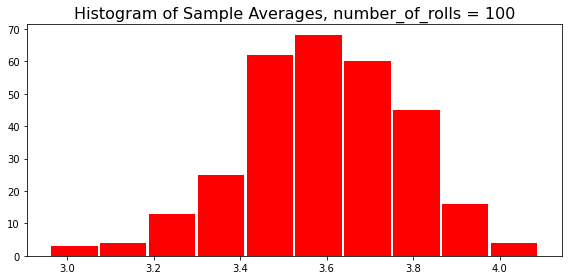

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np
from statistics import mean 

dice = (1, 2, 3, 4, 5, 6) 

# Check the probability distribution.
if (abs(sum(prob)-1)>5e-10):
    print('***** WARNING -- Probability distribution should sum to 1.')

# Create probability distribution
fig = plt.figure(figsize =(8, 4), tight_layout = True) 
plt.bar(dice, prob, width=0.8)   
plt.xlabel('y',fontsize=14)
plt.ylabel('p(y)',fontsize=14)
plt.title('Probability Distribution',fontsize=16)
plt.show()

# Conduct repeated experiments with the distribution detailed in prob
accumulatedProb = [0] * len(prob)
accumulatedProb[0] = prob[0]
for i in range(1,len(prob)):
    accumulatedProb[i] = prob[i] + accumulatedProb[i-1]

avgs = [0] * number_of_experiments # make a list of zeros
record = [0] * number_of_rolls     # make a list of zeros
for j in range(number_of_experiments):
  for i in range(number_of_rolls):
    temp = np.random.rand()  # roll the die
    result = 0 # this will take what you rolled
    k = 0
    while True:
      if temp < accumulatedProb[k]:
         result = k
         break
      k += 1
    record[i] = result # keep track of what was rolled with the die 
  avgs[j] = mean(record) # compute the mean of the rolls

# Create final plot 
fig = plt.figure(figsize =(8, 4), tight_layout = True) 
plt.hist(avgs, rwidth=0.95, color='red')   
plt.title('Histogram of Sample Averages, number_of_rolls = ' + str(number_of_rolls),fontsize=16)
plt.show()    